<a href="https://colab.research.google.com/github/AjayKarthi14/DSML/blob/main/Netflix_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading Netflix Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 4.58MB/s]


In [ ]:
df = pd.read_csv("netflix.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Basic Observations and some pre-processing

In [ ]:
df.shape

(8807, 12)

In [ ]:
# There are 8807 movies and 12 attributes with one int and others as object type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Number of unique values for each 12 attribute / Column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
# Unique Counts and frequency of top occurence for object type attributes
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
# Null values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Converting date_added from object to datetime type
df["date_added"] = pd.to_datetime(df["date_added"])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# adding 2 columns by having year and month from date_added attribute
df['added_year'] = df['date_added'].dt.year
df["added_year"].fillna(0, inplace = True)
df['added_year'] = df['added_year'].apply(lambda x : round(x))
df['added_month'] = df['date_added'].dt.month_name()
df[['date_added' , 'added_year' , 'added_month']]

,date_added,added_year,added_month
0,2021-09-25,2021,September
1,2021-09-24,2021,September
2,2021-09-24,2021,September
3,2021-09-24,2021,September
4,2021-09-24,2021,September
...,...,...,...
8802,2019-11-20,2019,November
8803,2019-07-01,2019,July
8804,2019-11-01,2019,November
8805,2020-01-11,2020,January


In [ ]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
# Splitting number by removing min in duration for movies
df.loc[df['duration'].str.contains('min') == True , 'duration'] = df.loc[df['duration'].str.contains('min') == True , 'duration'].apply(lambda x : str(x).split()[0])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January


In [ ]:
# Seperate Data sets for movies and TV Shows
df_mov = df.loc[df['type'] == 'Movie']
df_show = df.loc[df['type'] == 'TV Show']

In [ ]:
# Dropping null values from duration of movie dataset and changing the type from object to int type
df_mov.drop(df_mov.loc[df_mov['duration'].isna() == True].index , inplace = True)
df_mov['duration'].isna().sum()
df_mov['duration'] = df_mov['duration'].astype('int')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-15-db806f5e9177>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['duration'] = df_mov['duration'].astype('int')


In [ ]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6128 non-null   object        
 1   type          6128 non-null   object        
 2   title         6128 non-null   object        
 3   director      5940 non-null   object        
 4   cast          5653 non-null   object        
 5   country       5688 non-null   object        
 6   date_added    6128 non-null   datetime64[ns]
 7   release_year  6128 non-null   int64         
 8   rating        6126 non-null   object        
 9   duration      6128 non-null   int64         
 10  listed_in     6128 non-null   object        
 11  description   6128 non-null   object        
 12  added_year    6128 non-null   int64         
 13  added_month   6128 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 718.1+ KB


In [ ]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
# Replacing null and invalid values(min) to 'Not Available' in ratings attribute
df.loc[df['rating'].str.contains('min') == True , 'rating'] = 'Not Available'
df['rating'].fillna('Not Available' , inplace = True)

# Unnesting/Splitting of Data using stack()

In [ ]:
# Splitting multiple directors in a single record and stacking for having seperate records for each director
dir = df['director'].apply(lambda x: str(x).split(", ")).tolist()
df_dir = pd.DataFrame(dir, index = df['title'])
df_dir = df_dir.stack().reset_index()
df_dir.rename({0:'director'}, axis = 1 , inplace = True)
df_dir.drop('level_1' , axis =1 , inplace = True)
df_dir

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
# Replacing nan values with 'Unknown Director' value in director attribute
df_dir['director'].replace('nan' , 'Unknown Director' , inplace =True)
df_dir['director'].value_counts()

Unknown Director    2634
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: director, Length: 4994, dtype: int64

In [ ]:
# Splitting multiple actors in a single record and stacking for having seperate records for each actor
cast = df['cast'].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast , index = df['title'])
df_cast = df_cast.stack().reset_index()
df_cast.rename({0:'cast'}, axis = 1, inplace = True)
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
# Replacing nan values with 'Not Available' value in cast attribute
df_cast['cast'].replace('nan' , 'Not Available' , inplace = True)
df_cast['cast'].value_counts()

Not Available              825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

In [ ]:
# Splitting multiple country in a single record and stacking for having seperate records for each country
country = df['country'].apply(lambda x : str(x).split(", ")).tolist()
df_cont = pd.DataFrame(country , index = df['title'])
df_cont = df_cont.stack().reset_index()
df_cont.rename({0:'country'} , axis = 1 , inplace = True)
df_cont.drop('level_1' , axis = 1 , inplace = True)
df_cont

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [ ]:
# Splitting multiple genres in a single record and stacking for having seperate records for each genre
genre = df['listed_in'].apply(lambda x : str(x).split(", ")).tolist()
df_gen = pd.DataFrame(genre , index = df['title'])
df_gen = df_gen.stack().reset_index()
df_gen.drop('level_1' , axis = 1 , inplace = True)
df_gen.rename({0:'listed_in'} , axis = 1 , inplace = True)
df_gen

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


#Unnesting/Splitting Using pandas.melt()

In [ ]:
# Splitting multiple country in a single record and melting, dropping for having seperate records for each country
country = df['country'].apply(lambda x : str(x).split(", ")).tolist()
df_cont1 = pd.DataFrame(country)
df_cont1['title'] = df['title']
df_cont1 = df_cont1.melt(id_vars = ["title"], var_name = '1', value_name = 'country')
df_cont1.dropna(inplace = True)
df_cont1.drop('1' , axis = 1, inplace = True)
df_cont1.reset_index(drop = True, inplace =True)
df_cont1

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,The Look of Silence,Germany
10841,Barbecue,Sweden
10842,The Look of Silence,Netherlands
10843,Barbecue,United States


In [ ]:
# Splitting multiple director in a single record and melting, dropping for having seperate records for each director
dir1 = df['director'].apply(lambda x : str(x).split(", ")).tolist()
df_dir1 = pd.DataFrame(dir1)
df_dir1['title'] = df['title']
df_dir1 = df_dir1.melt(id_vars = ['title'] , var_name = '1' , value_name = 'director')
df_dir1.dropna(inplace = True)
df_dir1.drop('1' , axis = 1 , inplace = True)
df_dir1.reset_index(drop = True, inplace = True)
df_dir1

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Movie 43,Rusty Cundieff
9608,Walt Disney Animation Studios Short Films Coll...,Mike Gabriel
9609,HALO Legends,Hiroshi Yamazaki
9610,Movie 43,James Gunn


In [ ]:
# Splitting multiple actors in a single record and melting, dropping for having seperate records for each actor
cast1 = df['cast'].apply(lambda x : str(x).split(", ")).tolist()
df_cast1 = pd.DataFrame(cast1)
df_cast1['title'] = df['title']
df_cast1 = df_cast1.melt(id_vars = ['title'] , var_name = '1' , value_name = 'cast')
df_cast1.dropna(inplace = True)
df_cast1.drop('1' , axis = 1 , inplace = True)
df_cast1.reset_index(drop = True , inplace = True)
df_cast1

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Ganglands,Sami Bouajila
3,Jailbirds New Orleans,nan
4,Kota Factory,Mayur More
...,...,...
64946,Black Mirror,Jon Hamm
64947,Social Distance,Ayize Ma'at
64948,Black Mirror,Oona Chaplin
64949,Social Distance,Lovie Simone


In [ ]:
# Splitting multiple genres in a single record and melting, dropping for having seperate records for each genre
gen1 = df['listed_in'].apply(lambda x : str(x).split(", ")).tolist()
df_gen1 = pd.DataFrame(gen1)
df_gen1['title'] = df['title']
df_gen1 = df_gen1.melt(id_vars = ['title'] , var_name = '1' , value_name = 'genre')
df_gen1.dropna(inplace = True)
df_gen1.drop('1' , axis = 1 , inplace = True)
df_gen1.reset_index(drop = True , inplace = True)
df_gen1

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Ganglands,Crime TV Shows
3,Jailbirds New Orleans,Docuseries
4,Kota Factory,International TV Shows
...,...,...
19318,Zindagi Gulzar Hai,TV Dramas
19319,Zinzana,Thrillers
19320,Zodiac,Thrillers
19321,Zombie Dumb,TV Comedies


In [ ]:
# Merging the seperated director, cast and country to a single dataset
df_int1 = df_dir1.merge(df_cast1 , on = 'title')
df_int2 = df_int1.merge(df_cont1 , on = 'title')
df_int3 = df_int2.merge(df_gen1 , on = 'title')
df_int3

,title,director,cast,country,genre
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


# Merging and forming single dataset 

In [ ]:
# Merging sepaerate dataset of director, cast and country to a single dataset using inner join on title attribute
df_new1 = df_dir.merge(df_cast, on = 'title')
df_new2 = df_new1.merge(df_cont, on = 'title')
df_new3 = df_new2.merge(df_gen, on = 'title')
df_new3

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,Documentaries
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
# Replacing nan values with 'Not Available' in the country attribute
df_new3['country'].replace('nan' , 'Not Available' , inplace = True)
df_new3['country'].value_counts()

United States     59349
India             22814
United Kingdom    12945
Not Available     11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

In [ ]:
# seperating few columns from the original dataset
df_new4 = df[['title', 'show_id', 'type', 'date_added', 'release_year', 'rating', 'duration', 'description', 'added_year' , 'added_month']]
df_new4

,title,show_id,type,date_added,release_year,rating,duration,description,added_year,added_month
0,Dick Johnson Is Dead,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021,September
1,Blood & Water,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September
2,Ganglands,s3,TV Show,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,September
3,Jailbirds New Orleans,s4,TV Show,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",2021,September
4,Kota Factory,s5,TV Show,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,2021,September
...,...,...,...,...,...,...,...,...,...,...
8802,Zodiac,s8803,Movie,2019-11-20,2007,R,158,"A political cartoonist, a crime reporter and a...",2019,November
8803,Zombie Dumb,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",2019,July
8804,Zombieland,s8805,Movie,2019-11-01,2009,R,88,Looking to survive in a world taken over by zo...,2019,November
8805,Zoom,s8806,Movie,2020-01-11,2006,PG,88,"Dragged from civilian life, a former superhero...",2020,January


In [ ]:
# merging the above datasets using inner join on title attribute
df_movies = df_new3.merge(df_new4 , on = 'title')
df_movies

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,added_year,added_month
0,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021,September
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,March
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,March
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,March
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,2019,March


# Value Counts and Unique values

In [ ]:
# Number of unique directors avilable in the provided dataset
df_dir['director'].nunique()

4994

In [ ]:
# Number of occurences of each unique director in descending order
df_dir['director'].value_counts()

Unknown Director    2634
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: director, Length: 4994, dtype: int64

In [ ]:
# Number of unique actors avilable in the provided dataset
df_cast['cast'].nunique()

36440

In [ ]:
# Number of occurences of each unique actor in descending order
df_cast['cast'].value_counts()

Not Available              825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

In [ ]:
# Number of unique country avilable in the provided dataset
df_cont['country'].nunique()

128

In [ ]:
# Number of occurences of each unique country in descending order
df_cont['country'].value_counts()

United States     3689
India             1046
nan                831
United Kingdom     804
Canada             445
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 128, dtype: int64

In [ ]:
# Number of unique  genre avilable in the provided dataset
df_gen['listed_in'].nunique()

42

In [ ]:
# Number of occurences of each unique genre in descending order
df_gen['listed_in'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [ ]:
# Number of occurences of each unique type in descending order
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
# Number of unique release year avilable in the provided dataset
df['release_year'].nunique()

74

In [ ]:
# Number of occurences of each unique year in descending order
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
# Number of unique rating avilable in the provided dataset
df['rating'].nunique()

15

In [ ]:
# Number of occurences of each unique rating in descending order
df['rating'].value_counts()

TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 80
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
UR                  3
Name: rating, dtype: int64

In [ ]:
# Number of unique seasons avilable in the provided dataset
df_show['duration'].nunique()

15

In [ ]:
# Number of occurences of each unique seasons in descending order
df_show['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [ ]:
# Number of unique time duration avilable in the provided dataset
df_mov['duration'].nunique()

205

In [ ]:
# Number of occurences of each unique time duration in descending order
df_mov['duration'].value_counts()[:20]

90     152
94     146
93     146
97     146
91     144
95     137
96     130
92     129
102    122
98     120
99     118
101    116
88     116
103    114
106    111
100    108
89     106
104    104
86     103
105    101
Name: duration, dtype: int64

In [ ]:
# Number of unique added year avilable in the provided dataset
df[df['added_year'] != 0]['added_year'].nunique()

14

In [ ]:
# Number of occurences of each unique added year in descending order
df[df['added_year'] != 0]['added_year'].value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: added_year, dtype: int64

#Univariate Visualisation

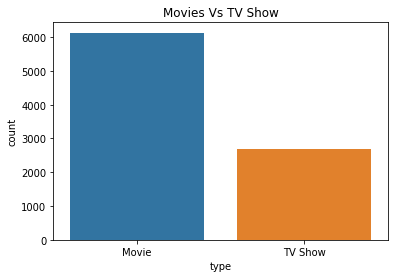

In [ ]:
# Count plot on the content type available in netflix
sns.countplot(x = 'type' , data = df)
plt.title("Movies Vs TV Show")
plt.show()

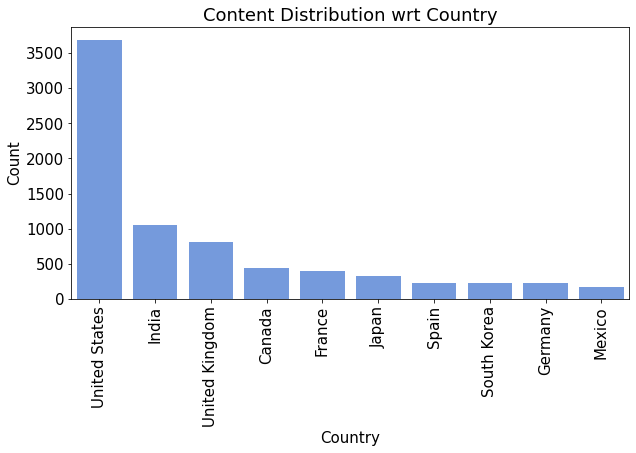

In [ ]:
# Content distribution across top 10 country
cont = df_cont.loc[df_cont['country'] != 'nan' , 'country'].value_counts().index[:10]
plt.figure(figsize = (10,5))
sns.countplot(x = 'country' , data = df_cont[df_cont['country'].isin(cont)] , color = 'cornflowerblue' , order = cont)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Country' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)
plt.title("Content Distribution wrt Country" , fontsize = 18)
plt.show()

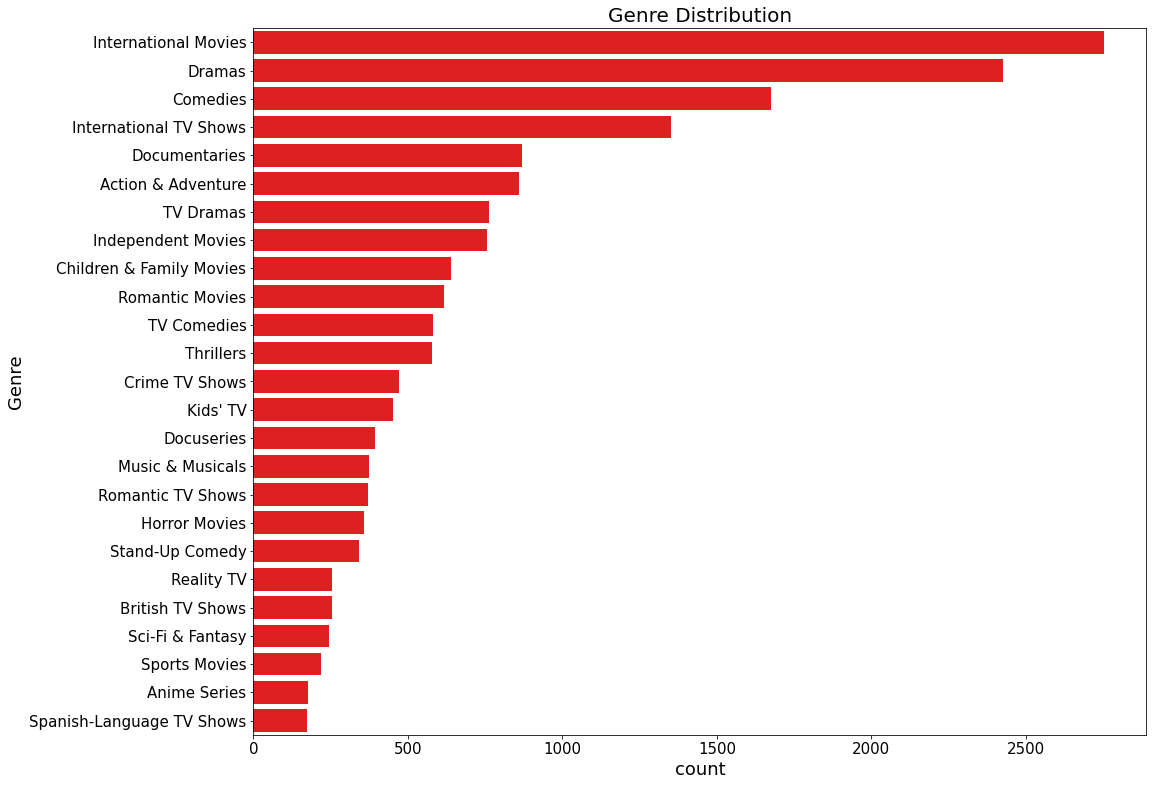

In [ ]:
# Genre Distribution count plot of top 25 genres
genre = df_gen['listed_in'].value_counts().index[:25]
plt.figure(figsize = (16,13))
sns.countplot(y = 'listed_in' , data = df_gen[df_gen['listed_in'].isin(genre)] , color = 'red' , order = genre)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('count' , fontsize = 18)
plt.ylabel('Genre' , fontsize = 18)
plt.title("Genre Distribution" , fontsize = 20)
plt.show()

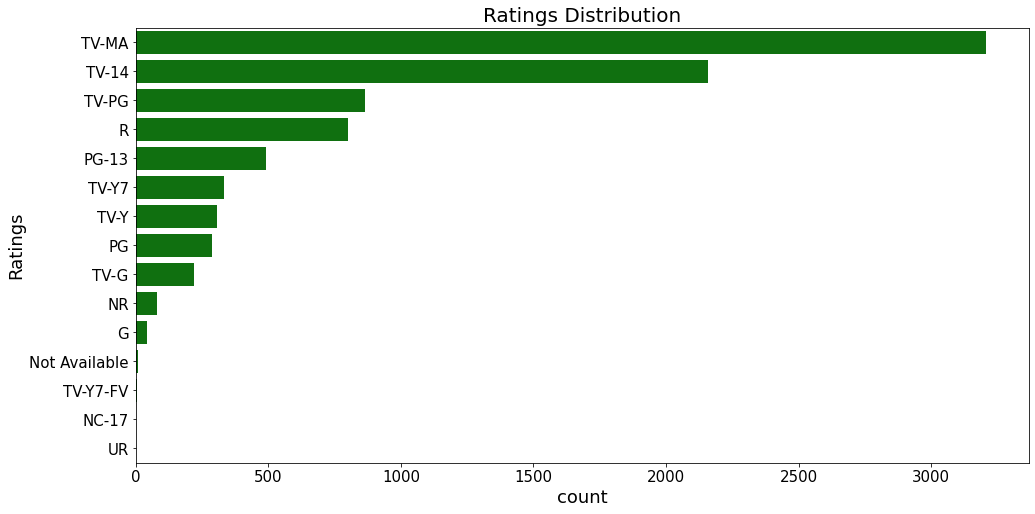

In [ ]:
# Rating Distribution count
rate = df['rating'].value_counts().index
plt.figure(figsize = (16,8))
sns.countplot(y = 'rating' , data = df , color = 'g' , order = rate)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('count' , fontsize = 18)
plt.ylabel('Ratings' , fontsize = 18)
plt.title("Ratings Distribution" , fontsize = 20)
plt.show()

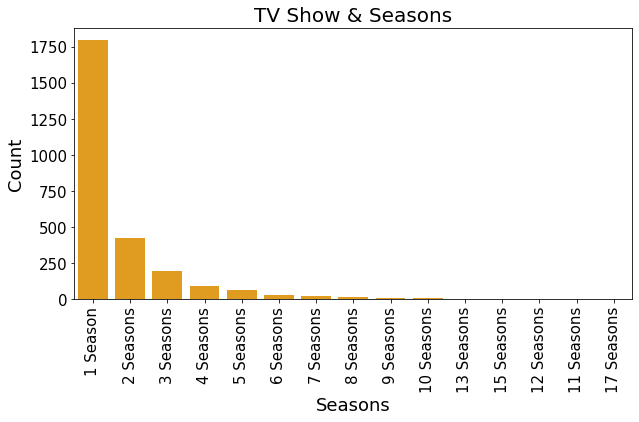

In [ ]:
# seasons distribution count for TV Show type content
seas = df_show['duration'].value_counts().index
plt.figure(figsize = (10,5))
sns.countplot(x = 'duration' , data = df_show , color = 'orange', order = seas)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Seasons' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("TV Show & Seasons" , fontsize = 20)
plt.show()

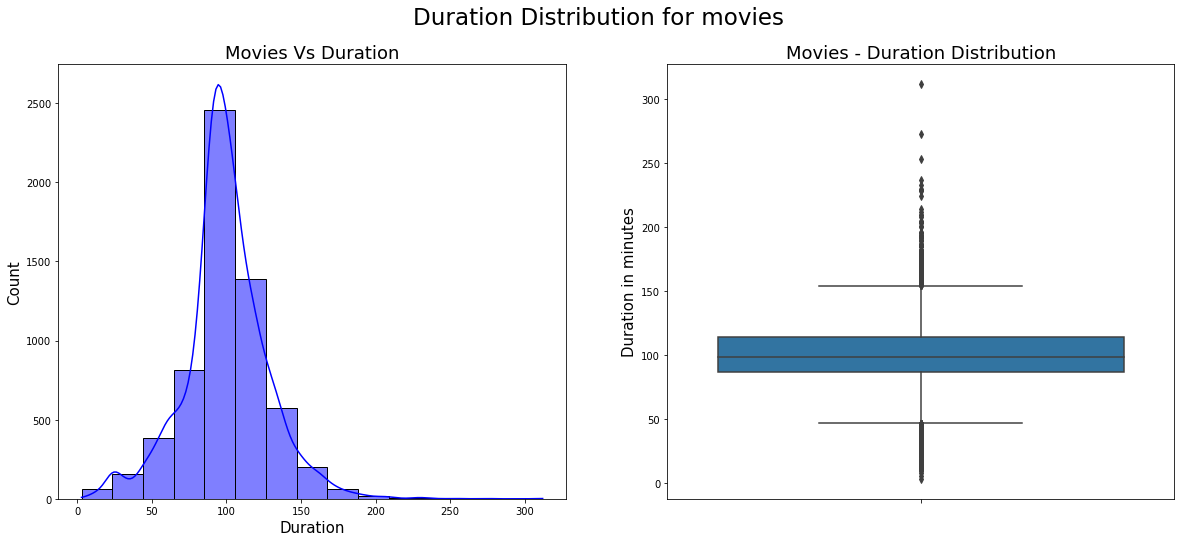

In [ ]:
# Distribution of Duration and the outliers of movies in minutes 
# Min - 50 minutes / Max - 160 minutes, < 50 & > 160 are outliers
# 50% movies in the duration range of 90 - 110 minutes
fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.histplot(x = df_mov['duration'] , bins = 15, color = 'blue' , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Duration' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)
plt.title("Movies Vs Duration" , fontsize = 18)

plt.subplot(1,2,2)
sns.boxplot(y = df_mov['duration'])
plt.yticks(fontsize = 10)
plt.ylabel('Duration in minutes' , fontsize = 15)
plt.title("Movies - Duration Distribution" , fontsize = 18)

fig.suptitle("Duration Distribution for movies" , fontsize = 23)
plt.show()

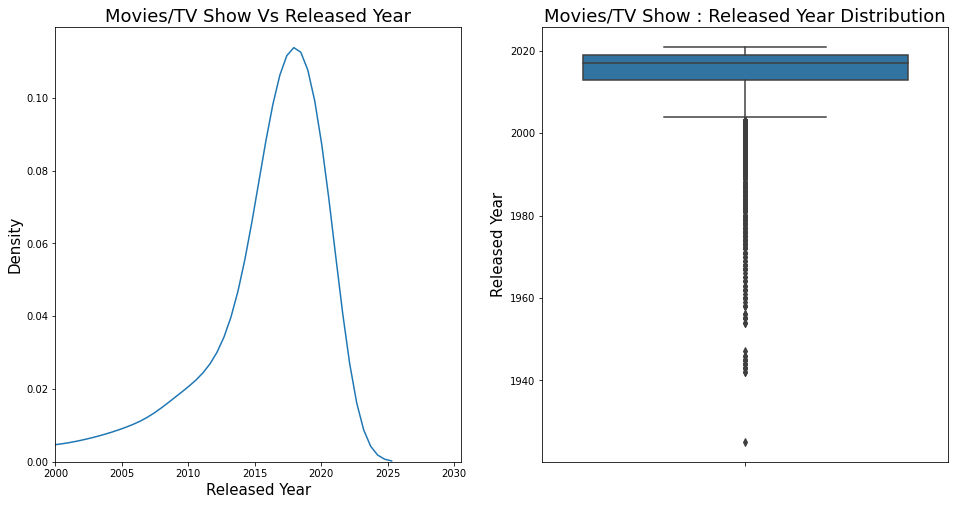

In [ ]:
# Released Year Distibution and outliers of content counts 
# Min - 2004 / Max - 2021 , contents released before 2004 are considered outliers
# 50% content released between the years  2015 - 2019
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.kdeplot(x = df['release_year'])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlim(left = 2000)
plt.xlabel('Released Year' , fontsize = 15)
plt.ylabel('Density' , fontsize = 15)
plt.title("Movies/TV Show Vs Released Year" , fontsize = 18)

plt.subplot(1,2,2)
sns.boxplot(y = df['release_year'])
plt.yticks(fontsize = 10)
plt.ylabel('Released Year' , fontsize = 15)
plt.title("Movies/TV Show : Released Year Distribution" , fontsize = 18)

fig.suptitle("Content Distribution over released year")
plt.show()

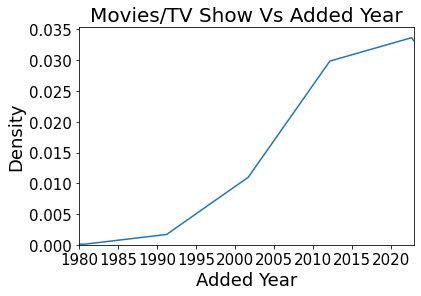

In [ ]:
# Density distribution of content added with the added year 
sns.kdeplot(x = df['added_year'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1980,2023))
plt.xlabel('Added Year' , fontsize = 18)
plt.ylabel('Density' , fontsize = 18)
plt.title("Movies/TV Show Vs Added Year" , fontsize = 20)
plt.show()

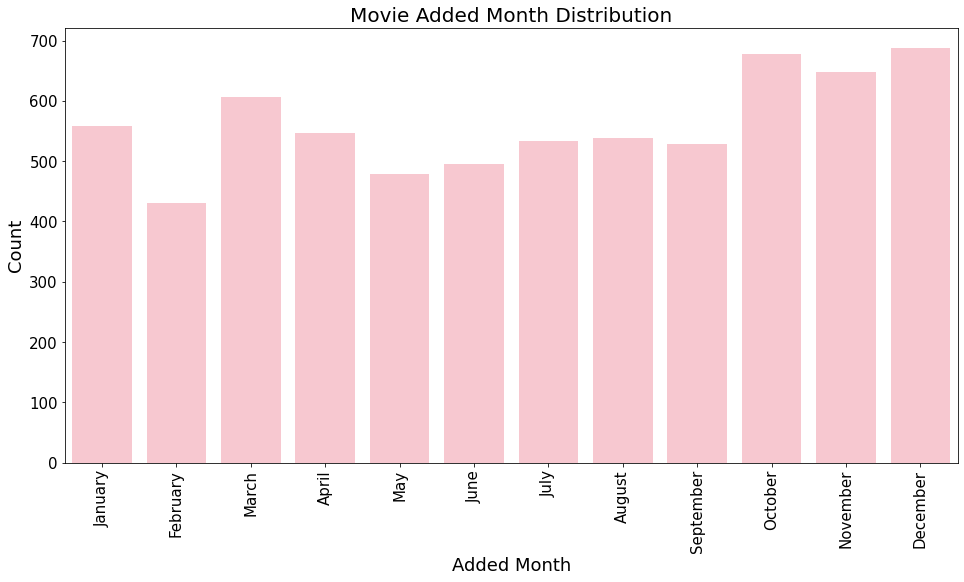

In [ ]:
# Distribution of content added with the added month 
plt.figure(figsize = (16,8))
month = ['January' , 'February' , 'March' ,'April' , 'May' , 'June' , 'July' , 'August' , 'September', 'October' , 'November' , 'December']
sns.countplot(x = 'added_month' , data = df[df['added_year'].isin([2017,2018,2019,2020])] , color = 'pink' , order = month)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Added Month' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Movie Added Month Distribution" , fontsize = 20)
plt.show()

# Bivariate Visualisation

In [ ]:
# Top 5 Data with the top 5 genres, country and rating
genre = df_gen['listed_in'].value_counts().index[:5]
country = df_cont.loc[df_cont['country'] != 'nan' , 'country'].value_counts().index[:5]
rating = df['rating'].value_counts().index[:5]
Top5_data = df_movies[(df_movies['listed_in'].isin(genre)) & (df_movies['country'].isin(country)) & (df_movies['rating'].isin(rating))]

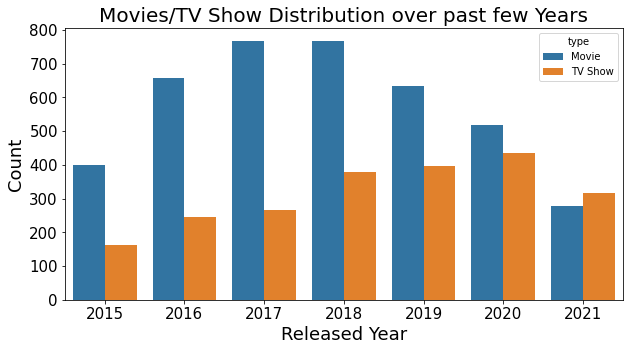

In [ ]:
# Movie/TV Show distribution count for the past 7 years
plt.figure(figsize = (10,5))
sns.countplot(x = 'release_year' , data = df[df['release_year'] > 2014] , hue = 'type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Released Year' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Movies/TV Show Distribution over past few Years" , fontsize = 20)
plt.show()

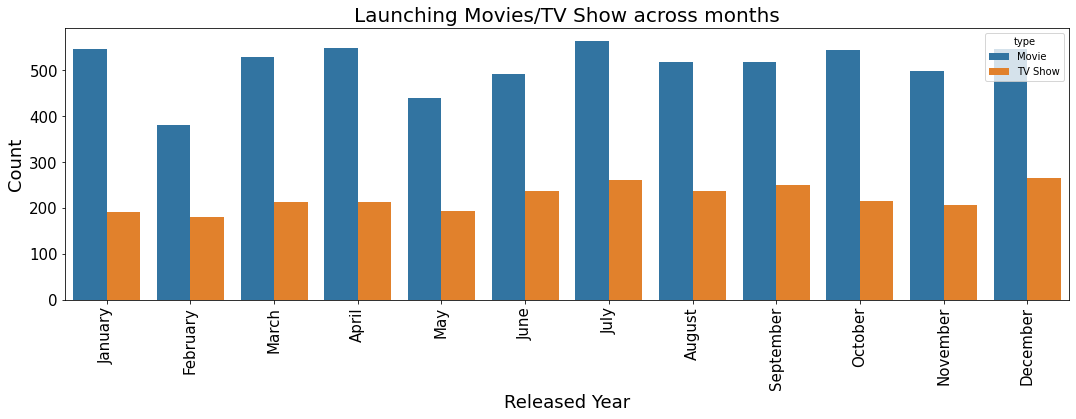

In [ ]:
# Movie/TV Show added Dostribution across various month
plt.figure(figsize = (18,5))
sns.countplot(x = 'added_month' , data = df , hue = 'type' , order = month)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Released Year' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Launching Movies/TV Show across months" , fontsize = 20)
plt.show()

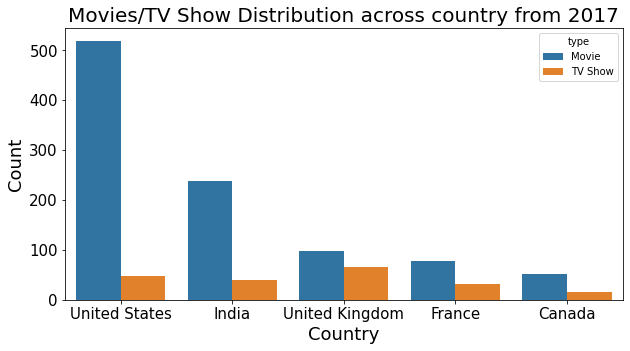

In [ ]:
# Movie/TV Show Distribution count across top 5 country for the past 4 years
plt.figure(figsize = (10,5))
data2 = Top5_data[Top5_data['release_year'] > 2017]
data1 = data2.drop_duplicates(subset = ['title','country'])
sns.countplot(x = 'country' , data = data1 , hue = 'type')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Country' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Movies/TV Show Distribution across country from 2017" , fontsize = 20)
plt.show()

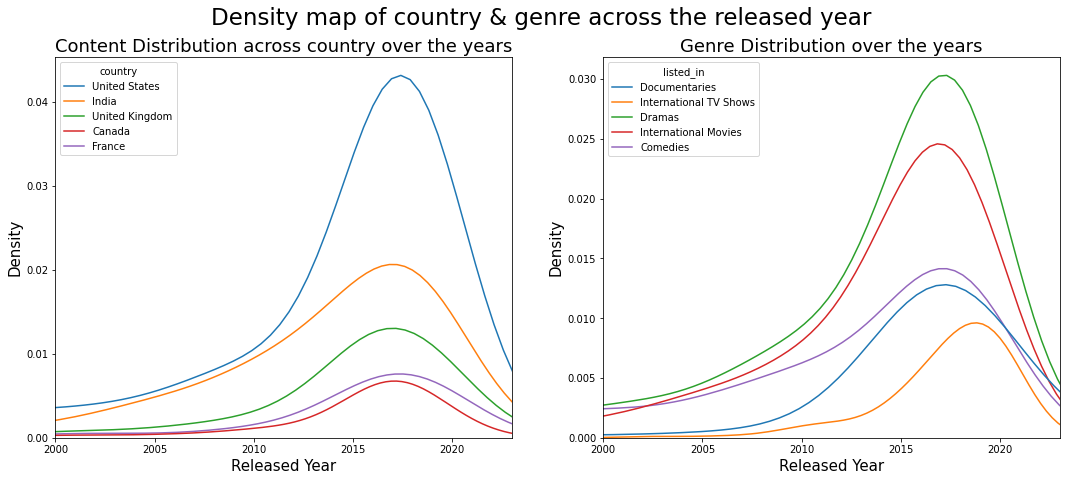

In [ ]:
# Density Distribution of Countrywise content and genre wise content across the released year
fig = plt.figure(figsize = (18,7))

plt.subplot(1,2,1)
data1 = Top5_data.drop_duplicates(subset = ['title','country'])
sns.kdeplot(x = 'release_year' , data = data1 , hue = 'country')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlim((2000,2023))
plt.xlabel('Released Year' , fontsize = 15)
plt.ylabel('Density' , fontsize = 15)
plt.title("Content Distribution across country over the years" , fontsize = 18)

plt.subplot(1,2,2)
data1 = Top5_data.drop_duplicates(subset = ['title','listed_in'])
sns.kdeplot(x = 'release_year' , data = data1 , hue = 'listed_in')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlim((2000,2023))
plt.xlabel('Released Year' , fontsize = 15)
plt.ylabel('Density' , fontsize = 15)
plt.title("Genre Distribution over the years" , fontsize = 18)

fig.suptitle('Density map of country & genre across the released year' , fontsize = 23)
plt.show()

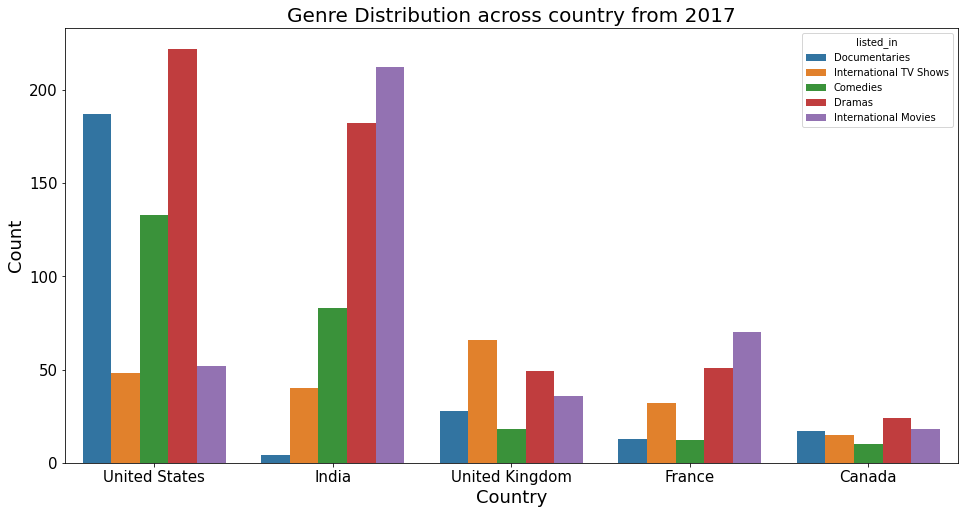

In [ ]:
# Genre Distribution Count across the top 5 country
plt.figure(figsize = (16,8))
data2 = Top5_data[Top5_data['release_year'] > 2017]
data1 = data2.drop_duplicates(subset = ['title','country','listed_in'])
sns.countplot(x = 'country' , data = data1 , hue = 'listed_in')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Country' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Genre Distribution across country from 2017" , fontsize = 20)
plt.show()

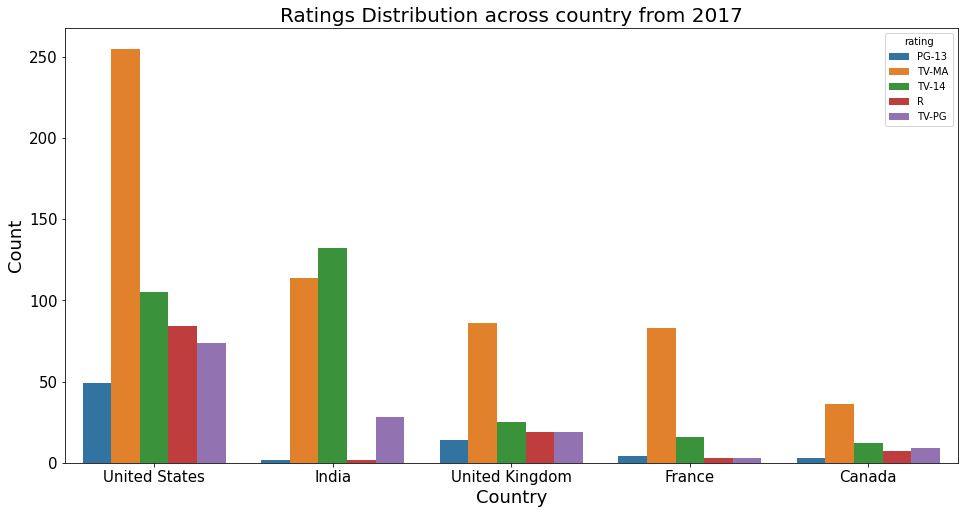

In [ ]:
# Rating Distribution count across the top 5 country
plt.figure(figsize = (16,8))
data2 = Top5_data[Top5_data['release_year'] > 2017]
data1 = data2.drop_duplicates(subset = ['title','country','rating'])
sns.countplot(x = 'country' , data = data1 , hue = 'rating')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Country' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Ratings Distribution across country from 2017" , fontsize = 20)
plt.show()

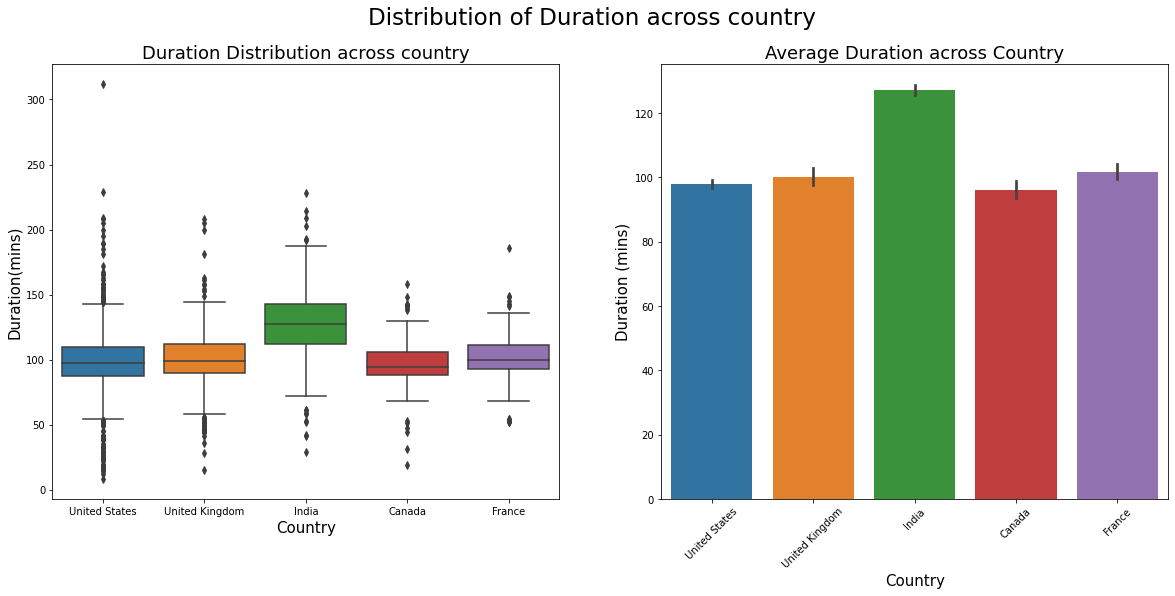

In [ ]:
# Duration Distribution, the outliers and the average duration of movies across Top 5 country
fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
data2 = Top5_data.drop_duplicates(subset = ['title','country'])
data1 = data2.loc[data2['type'] == 'Movie',['duration','country']]
data1['duration'] = data1['duration'].astype('int')
sns.boxplot(y = 'duration' , data = data1 , x = 'country')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Country' , fontsize = 15)
plt.ylabel('Duration(mins)' , fontsize = 15)
plt.title("Duration Distribution across country" , fontsize = 18)

plt.subplot(1,2,2)
sns.barplot(y = 'duration' , data = data1 , x = 'country' , estimator = np.mean)
plt.xticks(rotation = 45 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Country' , fontsize = 15)
plt.ylabel('Duration (mins)' , fontsize = 15)
plt.title("Average Duration across Country" , fontsize = 18)

fig.suptitle("Distribution of Duration across country" , fontsize = 23)
plt.show()

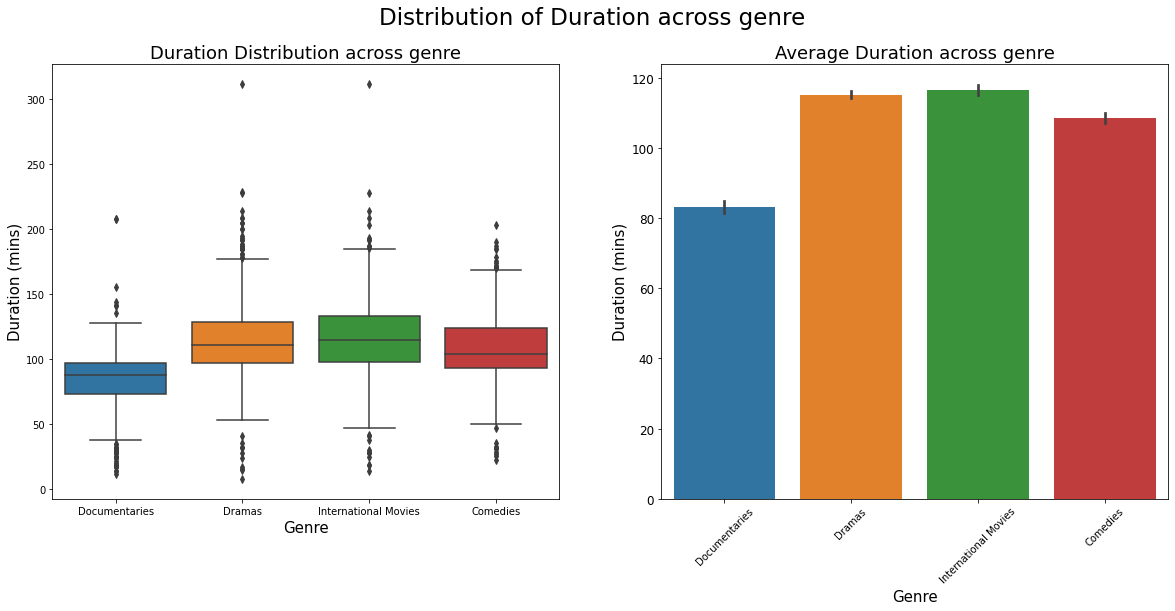

In [ ]:
# Duration Distribution, the outliers and the average duration of movies across Top 4 Genre
fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
data1 = Top5_data.drop_duplicates(subset = ['title','country','listed_in','duration'])
data1 = data1.loc[data1['type'] == 'Movie']
data1['duration'] = data1['duration'].astype('int')
sns.boxplot(y = 'duration' , data = data1 , x = 'listed_in')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Genre' , fontsize = 15)
plt.ylabel('Duration (mins)' , fontsize = 15)
plt.title("Duration Distribution across genre" , fontsize = 18)

plt.subplot(1,2,2)
sns.barplot(y = 'duration' , data = data1 , x = 'listed_in' , estimator = np.mean)
plt.xticks(rotation =45 , fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Genre' , fontsize = 15)
plt.ylabel('Duration (mins)' , fontsize = 15)
plt.title("Average Duration across genre" , fontsize = 18)

fig.suptitle("Distribution of Duration across genre" , fontsize = 23)
plt.show()

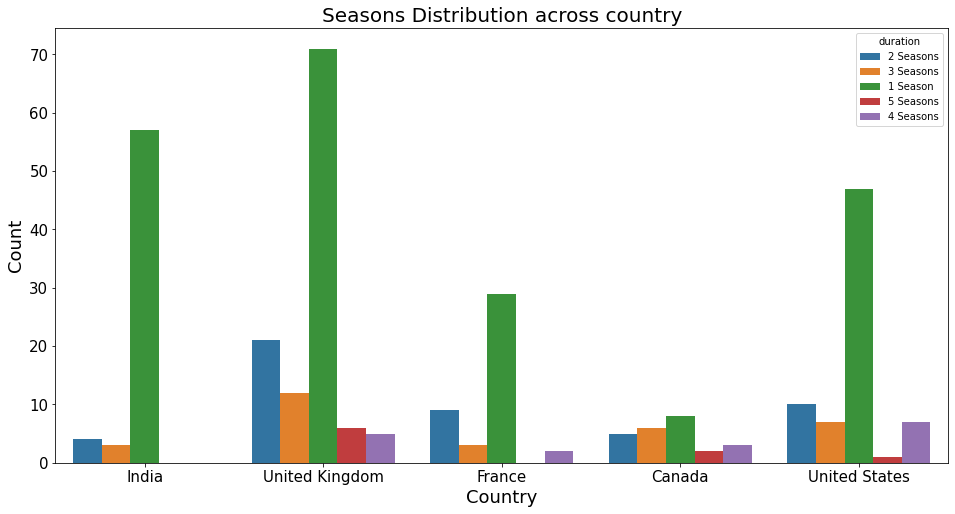

In [ ]:
# Top 5 Seasons Distribution count across the Top 5 Country
plt.figure(figsize = (16,8))
data2 = Top5_data[Top5_data['type'] == 'TV Show']
seas = data2['duration'].value_counts().index[:5]
data1 = data2.loc[data2['duration'].isin(seas)]
data1 = data1.drop_duplicates(subset = ['title' , 'country'])
sns.countplot(x = 'country' , data = data1 , hue = 'duration')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Country' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Seasons Distribution across country" , fontsize = 20)
plt.show()

# Top 3 Country Specific Analysis of directors, cast and genre

In [ ]:
us = df_movies.loc[df_movies['country'] == 'United States']
us_mov = us.loc[us['type'] == 'Movie']
us_show = us.loc[us['type'] == 'TV Show']

ind = df_movies.loc[df_movies['country'] == 'India']
ind_mov = ind.loc[ind['type'] == 'Movie']
ind_show = ind.loc[ind['type'] == 'TV Show']

uk = df_movies.loc[df_movies['country'] == 'United Kingdom']
uk_mov = uk.loc[uk['type'] == 'Movie']
uk_show = uk.loc[uk['type'] == 'TV Show']

dir_mov_us = us_mov.loc[us_mov['director'] != 'Unknown Director' , 'director'].value_counts().index[:5]
cast_mov_us = us_mov.loc[us_mov['cast'] != 'Not Available' , 'cast'].value_counts().index[:5]
gen_mov_us = us_mov['listed_in'].value_counts().index[:5]
usmov = us_mov.loc[(us_mov['director'].isin(dir_mov_us)) | (us_mov['cast'].isin(cast_mov_us)) | (us_mov['listed_in'].isin(gen_mov_us))]

dir_tv_us = us_show.loc[us_show['director'] != 'Unknown Director' , 'director'].value_counts().index[:5]
cast_tv_us = us_show.loc[us_show['cast'] != 'Not Available' , 'cast'].value_counts().index[:5]
gen_tv_us = us_show['listed_in'].value_counts().index[:5]

dir_mov_ind = ind_mov.loc[ind_mov['director'] != 'Unknown Director' , 'director'].value_counts().index[:5]
cast_mov_ind = ind_mov.loc[ind_mov['cast'] != 'Not Available' , 'cast'].value_counts().index[:5]
gen_mov_ind = ind_mov['listed_in'].value_counts().index[:5]


dir_tv_ind = ind_show.loc[ind_show['director'] != 'Unknown Director' , 'director'].value_counts().index[:5]
cast_tv_ind = ind_show.loc[ind_show['cast'] != 'Not Available' , 'cast'].value_counts().index[:5]
gen_tv_ind = ind_show['listed_in'].value_counts().index[:5]

dir_mov_uk = uk_mov.loc[uk_mov['director'] != 'Unknown Director' , 'director'].value_counts().index[:5]
cast_mov_uk = uk_mov.loc[uk_mov['cast'] != 'Not Available' , 'cast'].value_counts().index[:5]
gen_mov_uk = uk_mov['listed_in'].value_counts().index[:5]

dir_tv_uk = uk_show.loc[uk_show['director'] != 'Unknown Director' , 'director'].value_counts().index[:5]
cast_tv_uk = uk_show.loc[uk_show['cast'] != 'Not Available' , 'cast'].value_counts().index[:5]
gen_tv_uk = uk_show['listed_in'].value_counts().index[:5]

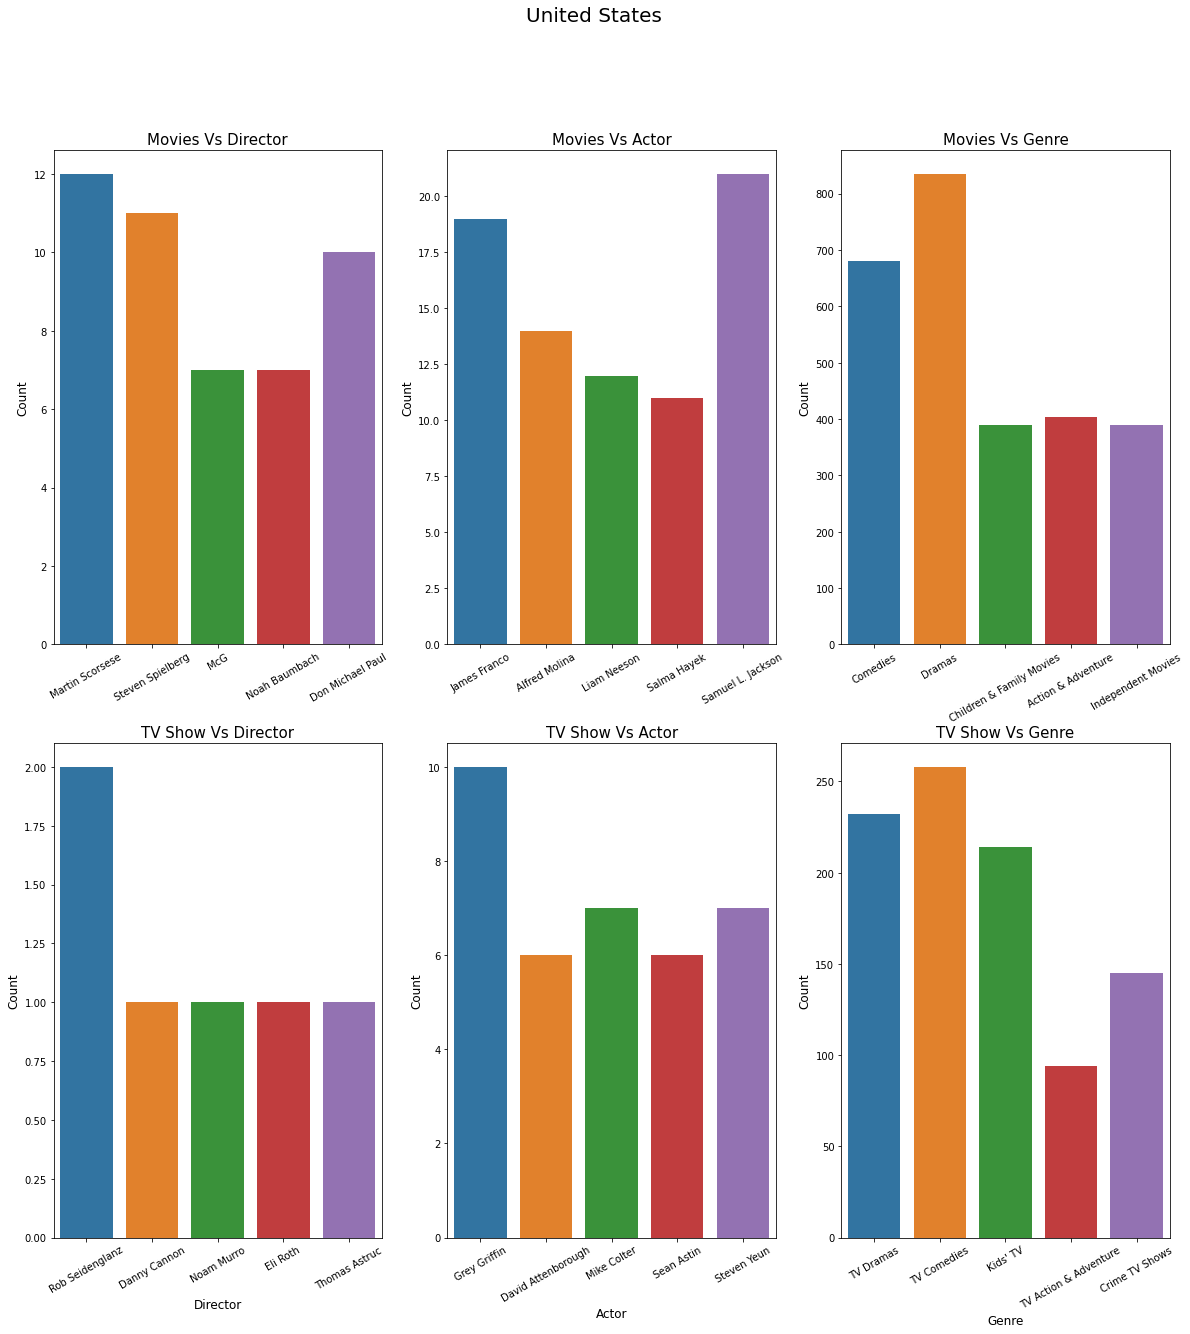

In [ ]:
# US Analysis of top 5 Director, Cast and genre
fig = plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
data2 = us_mov.loc[us_mov['director'].isin(dir_mov_us)]
data1 = data2.drop_duplicates(subset = ['title' , 'director'])
sns.countplot(x = 'director' , data = data1 , order = dir_mov_us)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ')
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Director" , fontsize = 15)


plt.subplot(2,3,4)
data2 = us_show.loc[us_show['director'].isin(dir_tv_us)]
data1 = data2.drop_duplicates(subset = ['title' , 'director'])
sns.countplot(x = 'director' , data = data1 , order = dir_tv_us)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Director' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Director" , fontsize = 15)

plt.subplot(2,3,2)
data2 = us_mov.loc[us_mov['cast'].isin(cast_mov_us)]
data1 = data2.drop_duplicates(subset = ['title' , 'cast'])
sns.countplot(x = 'cast' , data = data1 , order = cast_mov_us)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ' )
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Actor" , fontsize = 15)


plt.subplot(2,3,5)
data2 = us_show.loc[us_show['cast'].isin(cast_tv_us)] 
data1 = data2.drop_duplicates(subset = ['title' , 'cast'])
sns.countplot(x = 'cast' , data = data1, order = cast_tv_us)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Actor' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Actor" , fontsize = 15)

plt.subplot(2,3,3)
data2 = us_mov.loc[us_mov['listed_in'].isin(gen_mov_us)]
data1 = data2.drop_duplicates(subset = ['title' , 'listed_in'])
sns.countplot(x = 'listed_in' , data = data1 , order = gen_mov_us)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ' )
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Genre" , fontsize = 15)


plt.subplot(2,3,6)
data2 = us_show.loc[us_show['listed_in'].isin(gen_tv_us)]
data1 = data2.drop_duplicates(subset = ['title' , 'listed_in'])
sns.countplot(x = 'listed_in' , data = data1 , order = gen_tv_us)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Genre' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Genre" , fontsize = 15)

fig.suptitle('United States' , fontsize = 20)
plt.show()

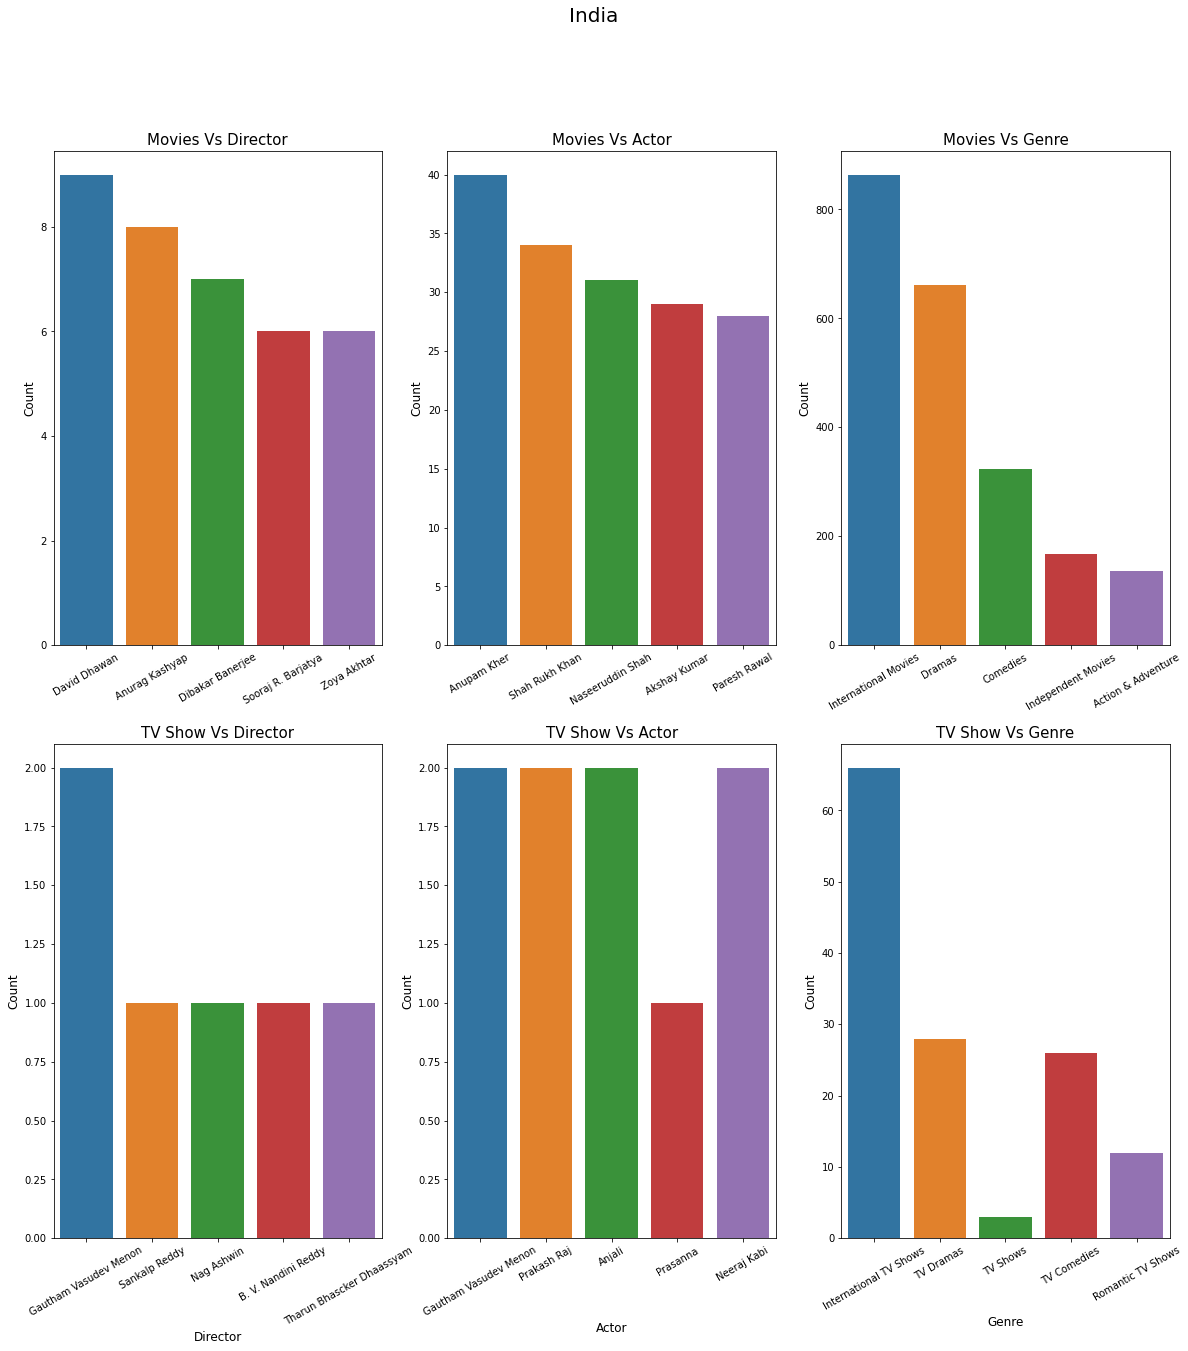

In [ ]:
# India - Analysis of top 5 Director, Cast and genre
fig = plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
data2 = ind_mov.loc[ind_mov['director'].isin(dir_mov_ind)]
data1 = data2.drop_duplicates(subset = ['title' , 'director'])
sns.countplot(x = 'director' , data = data1 , order = dir_mov_ind)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ')
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Director" , fontsize = 15)

plt.subplot(2,3,4)
data2 = ind_show.loc[ind_show['director'].isin(dir_tv_ind)]
data1 = data2.drop_duplicates(subset = ['title' , 'director'])
sns.countplot(x = 'director' , data = data1 , order = dir_tv_ind)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Director' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Director" , fontsize = 15)

plt.subplot(2,3,2)
data2 = ind_mov.loc[ind_mov['cast'].isin(cast_mov_ind)]
data1 = data2.drop_duplicates(subset = ['title' , 'cast'])
sns.countplot(x = 'cast' , data = data1 , order = cast_mov_ind)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ' )
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Actor" , fontsize = 15)

plt.subplot(2,3,5)
data2 = ind_show.loc[ind_show['cast'].isin(cast_tv_ind)] 
data1 = data2.drop_duplicates(subset = ['title' , 'cast'])
sns.countplot(x = 'cast' , data = data1, order = cast_tv_ind)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Actor' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Actor" , fontsize = 15)

plt.subplot(2,3,3)
data2 = ind_mov.loc[ind_mov['listed_in'].isin(gen_mov_ind)]
data1 = data2.drop_duplicates(subset = ['title' , 'listed_in'])
sns.countplot(x = 'listed_in' , data = data1 , order = gen_mov_ind)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ' )
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Genre" , fontsize = 15)

plt.subplot(2,3,6)
data2 = ind_show.loc[ind_show['listed_in'].isin(gen_tv_ind)]
data1 = data2.drop_duplicates(subset = ['title' , 'listed_in'])
sns.countplot(x = 'listed_in' , data = data1 , order = gen_tv_ind)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Genre' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Genre" , fontsize = 15)

fig.suptitle('India' , fontsize = 20)
plt.show()



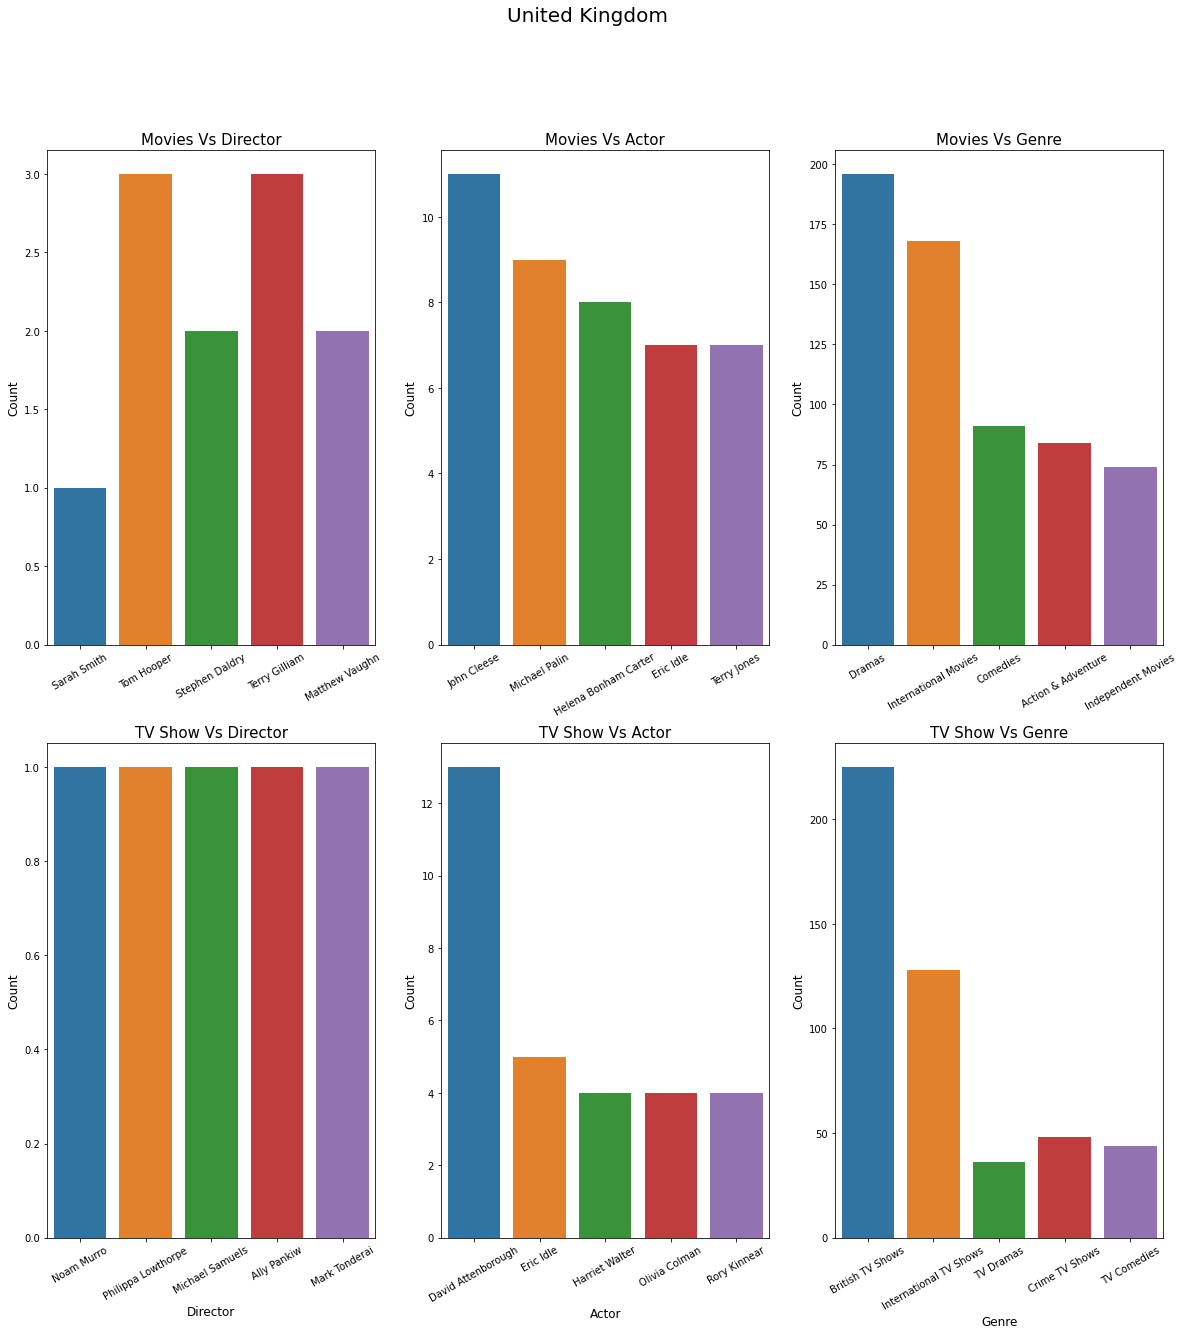

In [ ]:
# Uk - Analysis of top 5 Director, Cast and genre
fig = plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
data2 = uk_mov.loc[uk_mov['director'].isin(dir_mov_uk)]
data1 = data2.drop_duplicates(subset = ['title' , 'director'])
sns.countplot(x = 'director' , data = data1 , order = dir_mov_uk)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ')
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Director" , fontsize = 15)

plt.subplot(2,3,4)
data2 = uk_show.loc[uk_show['director'].isin(dir_tv_uk)]
data1 = data2.drop_duplicates(subset = ['title' , 'director'])
sns.countplot(x = 'director' , data = data1 , order = dir_tv_uk)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Director' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Director" , fontsize = 15)

plt.subplot(2,3,2)
data2 = uk_mov.loc[uk_mov['cast'].isin(cast_mov_uk)]
data1 = data2.drop_duplicates(subset = ['title' , 'cast'])
sns.countplot(x = 'cast' , data = data1 , order = cast_mov_uk)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ' )
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Actor" , fontsize = 15)

plt.subplot(2,3,5)
data2 = uk_show.loc[uk_show['cast'].isin(cast_tv_uk)] 
data1 = data2.drop_duplicates(subset = ['title' , 'cast'])
sns.countplot(x = 'cast' , data = data1, order = cast_tv_uk)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Actor' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Actor" , fontsize = 15)

plt.subplot(2,3,3)
data2 = uk_mov.loc[uk_mov['listed_in'].isin(gen_mov_uk)]
data1 = data2.drop_duplicates(subset = ['title' , 'listed_in'])
sns.countplot(x = 'listed_in' , data = data1 , order = gen_mov_uk)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel(' ' )
plt.ylabel('Count' , fontsize = 12)
plt.title("Movies Vs Genre" , fontsize = 15)

plt.subplot(2,3,6)
data2 = uk_show.loc[uk_show['listed_in'].isin(gen_tv_uk)]
data1 = data2.drop_duplicates(subset = ['title' , 'listed_in'])
sns.countplot(x = 'listed_in' , data = data1 , order = gen_tv_uk)
plt.xticks(rotation = 30 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Genre' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)
plt.title("TV Show Vs Genre" , fontsize = 15)

fig.suptitle('United Kingdom' , fontsize = 20)
plt.show()



In [ ]:
us_mov_gen = us_mov.drop_duplicates(subset = ['title','listed_in'])['listed_in'].value_counts().index[:3]
us_tv_gen = us_show.drop_duplicates(subset = ['title','listed_in'])['listed_in'].value_counts().index[:3]

ind_mov_gen = ind_mov.drop_duplicates(subset = ['title','listed_in'])['listed_in'].value_counts().index[:3]
ind_tv_gen = ind_show.drop_duplicates(subset = ['title','listed_in'])['listed_in'].value_counts().index[:3]

uk_mov_gen = uk_mov.drop_duplicates(subset = ['title','listed_in'])['listed_in'].value_counts().index[:3]
uk_tv_gen = uk_show.drop_duplicates(subset = ['title','listed_in'])['listed_in'].value_counts().index[:3]

usmov = us_mov.loc[us_mov['listed_in'].isin(us_mov_gen)]
usshow = us_show.loc[us_show['listed_in'].isin(us_tv_gen)]

indmov = ind_mov.loc[ind_mov['listed_in'].isin(ind_mov_gen)]
indshow = ind_show.loc[ind_show['listed_in'].isin(ind_tv_gen)]

ukmov = uk_mov.loc[uk_mov['listed_in'].isin(uk_mov_gen)]
ukshow = uk_show.loc[uk_show['listed_in'].isin(uk_tv_gen)]

usmov_drama_dir = usmov.loc[usmov['listed_in'] == us_mov_gen[0]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:3]
usmov_comedy_dir = usmov.loc[usmov['listed_in'] == us_mov_gen[1]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
usmov_document_dir = usmov.loc[usmov['listed_in'] == us_mov_gen[2]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
usmov_drama_cast = usmov.loc[usmov['listed_in'] == us_mov_gen[0]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:3]
usmov_comedy_cast = usmov.loc[usmov['listed_in'] == us_mov_gen[1]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:3]
usmov_document_cast = usmov.loc[usmov['listed_in'] == us_mov_gen[2]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]

indmov_intmov_dir = indmov.loc[indmov['listed_in'] == ind_mov_gen[0]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
indmov_drama_dir = indmov.loc[indmov['listed_in'] == ind_mov_gen[1]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
indmov_comedy_dir = indmov.loc[indmov['listed_in'] == ind_mov_gen[2]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
indmov_intmov_cast = indmov.loc[indmov['listed_in'] == ind_mov_gen[0]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
indmov_drama_cast = indmov.loc[indmov['listed_in'] == ind_mov_gen[1]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
indmov_comedy_cast = indmov.loc[indmov['listed_in'] == ind_mov_gen[2]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]

ukmov_drama_dir = ukmov.loc[ukmov['listed_in'] == uk_mov_gen[0]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
ukmov_intmov_dir = ukmov.loc[ukmov['listed_in'] == uk_mov_gen[1]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
ukmov_document_dir = ukmov.loc[ukmov['listed_in'] == uk_mov_gen[2]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
ukmov_drama_cast = ukmov.loc[ukmov['listed_in'] == uk_mov_gen[0]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
ukmov_intmov_cast = ukmov.loc[ukmov['listed_in'] == uk_mov_gen[1]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
ukmov_document_cast = ukmov.loc[ukmov['listed_in'] == uk_mov_gen[2]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]

usshow_tvcom_dir = usshow.loc[usshow['listed_in'] == us_tv_gen[0]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
usshow_tvdram_dir = usshow.loc[usshow['listed_in'] == us_tv_gen[1]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
usshow_tvkid_dir = usshow.loc[usshow['listed_in'] == us_tv_gen[2]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
usshow_tvcom_cast = usshow.loc[usshow['listed_in'] == us_tv_gen[0]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
usshow_tvdram_cast = usshow.loc[usshow['listed_in'] == us_tv_gen[1]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
usshow_tvkid_cast = usshow.loc[usshow['listed_in'] == us_tv_gen[2]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]

indshow_inttv_dir = indshow.loc[indshow['listed_in'] == ind_tv_gen[0]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
indshow_tvdram_dir = indshow.loc[indshow['listed_in'] == ind_tv_gen[1]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
indshow_tvcom_dir = indshow.loc[indshow['listed_in'] == ind_tv_gen[2]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
indshow_inttv_cast = indshow.loc[indshow['listed_in'] == ind_tv_gen[0]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
indshow_tvdram_cast = indshow.loc[indshow['listed_in'] == ind_tv_gen[1]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
indshow_tvcom_cast = indshow.loc[indshow['listed_in'] == ind_tv_gen[2]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]

ukshow_brittv_dir = ukshow.loc[ukshow['listed_in'] == uk_tv_gen[0]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
ukshow_inttv_dir = ukshow.loc[ukshow['listed_in'] == uk_tv_gen[1]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
ukshow_docuser_dir = ukshow.loc[ukshow['listed_in'] == uk_tv_gen[2]].drop_duplicates(subset = ['title' , 'director'])['director'].value_counts().index[:4]
ukshow_brittv_cast = ukshow.loc[ukshow['listed_in'] == uk_tv_gen[0]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
ukshow_inttv_cast = ukshow.loc[ukshow['listed_in'] == uk_tv_gen[1]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]
ukshow_docuser_cast = ukshow.loc[ukshow['listed_in'] == uk_tv_gen[2]].drop_duplicates(subset = ['title' , 'cast'])['cast'].value_counts().index[:4]

In [ ]:
# US Movie top 3 genre
print(us_mov_gen)

Index(['Dramas', 'Comedies', 'Documentaries'], dtype='object')


In [ ]:
# US top 3 directors from the top 3 genres for movies
print(usmov_drama_dir , usmov_comedy_dir , usmov_document_dir )

Index(['Martin Scorsese', 'Steven Spielberg', 'Lasse Hallström'], dtype='object') Index(['Unknown Director', 'Robert Rodriguez', 'Noah Baumbach',
       'Vince Marcello'],
      dtype='object') Index(['Unknown Director', 'Vlad Yudin', 'Matt Askem', 'Frank Capra'], dtype='object')


In [ ]:
# US top 3 Actors from the top 3 genres for movies
print(usmov_drama_cast , usmov_comedy_cast , usmov_document_cast )

Index(['James Franco', 'Kristen Stewart', 'Amy Adams'], dtype='object') Index(['Adam Sandler', 'Molly Shannon', 'Seth Rogen'], dtype='object') Index(['Not Available', 'Craig Sechler', 'Samuel West', 'Quincy Jones'], dtype='object')


In [ ]:
# India Movie top 3 genre
print(ind_mov_gen)

Index(['International Movies', 'Dramas', 'Comedies'], dtype='object')


In [ ]:
# India top 3 directors from the top 3 genres for movies
print(indmov_intmov_dir , indmov_drama_dir , indmov_comedy_dir)

Index(['Unknown Director', 'Umesh Mehra', 'David Dhawan', 'Anurag Kashyap'], dtype='object') Index(['Anurag Kashyap', 'Umesh Mehra', 'Sooraj R. Barjatya',
       'Dibakar Banerjee'],
      dtype='object') Index(['David Dhawan', 'Anees Bazmee', 'Indra Kumar', 'Hrishikesh Mukherjee'], dtype='object')


In [ ]:
# India top 3 Actors from the top 3 genres for movies
print(indmov_intmov_cast , indmov_drama_cast , indmov_comedy_cast)

Index(['Anupam Kher', 'Shah Rukh Khan', 'Om Puri', 'Akshay Kumar'], dtype='object') Index(['Shah Rukh Khan', 'Naseeruddin Shah', 'Anupam Kher',
       'Amitabh Bachchan'],
      dtype='object') Index(['Anupam Kher', 'Paresh Rawal', 'Boman Irani', 'Akshay Kumar'], dtype='object')


In [ ]:
# UK Movie top 3 genre
print(uk_mov_gen)

Index(['Dramas', 'International Movies', 'Documentaries'], dtype='object')


In [ ]:
# UK top 3 directors from the top 3 genres for movies
print(ukmov_drama_dir , ukmov_intmov_dir , ukmov_document_dir)

Index(['Tom Hooper', 'Paul Andrew Williams', 'Lars von Trier', 'Danny Boyle'], dtype='object') Index(['Unknown Director', 'Tom Hooper', 'Sam Hobkinson', 'Obi Emelonye'], dtype='object') Index(['Unknown Director', 'Edward Cotterill', 'Jerry Rothwell',
       'Cosima Spender'],
      dtype='object')


In [ ]:
# UK top 3 Actors from the top 3 genres for movies
print(ukmov_drama_cast , ukmov_intmov_cast , ukmov_document_cast)

Index(['Helena Bonham Carter', 'Eddie Redmayne', 'Eddie Marsan',
       'Brendan Gleeson'],
      dtype='object') Index(['Not Available', 'Ben Mendelsohn', 'Samuel West', 'Ben Whishaw'], dtype='object') Index(['Not Available', 'Samuel West', 'Rachael Stirling', 'John Cleese'], dtype='object')


In [ ]:
# US TV Show top 3 genre
print(us_tv_gen)

Index(['TV Comedies', 'TV Dramas', 'Kids' TV'], dtype='object')


In [ ]:
# US top 3 directors from the top 3 genres for TV Shows
print(usshow_tvcom_dir , usshow_tvdram_dir , usshow_tvkid_dir )

Index(['Unknown Director', 'Stan Lathan', 'Alexx Media', 'Kenny Ortega'], dtype='object') Index(['Unknown Director', 'Rob Seidenglanz', 'Daniel Minahan',
       'Damien Chazelle'],
      dtype='object') Index(['Unknown Director', 'Tony Collingwood', 'Kenny Ortega', 'Kyran Kelly'], dtype='object')


In [ ]:
# US top 3 Actors from the top 3 genres for TV Shows
print(usshow_tvcom_cast , usshow_tvdram_cast , usshow_tvkid_cast )

Index(['Fortune Feimster', 'Grey Griffin', 'Tracy Morgan', 'Fred Armisen'], dtype='object') Index(['Mike Colter', 'Giancarlo Esposito', 'Kate Walsh', 'Laura Linney'], dtype='object') Index(['Grey Griffin', 'Vincent Tong', 'Tara Strong', 'Not Available'], dtype='object')


In [ ]:
# India TV Show top 3 genre
print(ind_tv_gen)

Index(['International TV Shows', 'TV Dramas', 'TV Comedies'], dtype='object')


In [ ]:
# India top 3 directors from the top 3 genres for TV Shows
print(indshow_inttv_dir , indshow_tvdram_dir , indshow_tvcom_dir)

Index(['Unknown Director', 'Tharun Bhascker Dhaassyam', 'B. V. Nandini Reddy',
       'Nag Ashwin'],
      dtype='object') Index(['Unknown Director', 'Tharun Bhascker Dhaassyam', 'B. V. Nandini Reddy',
       'Nag Ashwin'],
      dtype='object') Index(['Unknown Director', 'Vijay Roche', 'Dheeraj Berry'], dtype='object')


In [ ]:
# India top 3 Actors from the top 3 genres for TV Shows
print(indshow_inttv_cast , indshow_tvdram_cast , indshow_tvcom_cast)

Index(['Not Available', 'Aahana Kumra', 'Ulka Gupta', 'Reena Aggarwal'], dtype='object') Index(['Chandan Anand', 'Radhika Apte', 'Rajesh Tailang', 'Not Available'], dtype='object') Index(['Nishka Raheja', 'Aranya Kaur', 'Rajesh Kava', 'Gagan Arora'], dtype='object')


In [ ]:
# UK TV Show top 3 genre
print(uk_tv_gen)

Index(['British TV Shows', 'International TV Shows', 'Docuseries'], dtype='object')


In [ ]:
# UK top 3 directors from the top 3 genres for TV Shows
print(ukshow_brittv_dir , ukshow_inttv_dir , ukshow_docuser_dir)

Index(['Unknown Director', 'Alastair Fothergill', 'Andy Devonshire',
       'James Hawes'],
      dtype='object') Index(['Unknown Director', 'Alastair Fothergill', 'Philippa Lowthorpe',
       'Damien Chazelle'],
      dtype='object') Index(['Unknown Director', 'Alastair Fothergill', 'Simon Frederick',
       'Ellena Wood'],
      dtype='object')


In [ ]:
# UK top 3 Actors from the top 3 genres for TV Shows
print(ukshow_brittv_cast , ukshow_inttv_cast , ukshow_docuser_cast)

Index(['Not Available', 'David Attenborough', 'Olivia Colman', 'Greg Davies'], dtype='object') Index(['Not Available', 'David Attenborough', 'Harriet Walter',
       'Rory Kinnear'],
      dtype='object') Index(['Not Available', 'David Attenborough', 'Michael Palin', 'Terry Jones'], dtype='object')


# Corrlation - heatmaps & pairplots ( Only on type - movie )

In [ ]:
cout1 = df_mov['country'].value_counts().index[:7]
df_mov1 = df_mov.loc[df['country'].isin(cout1)]

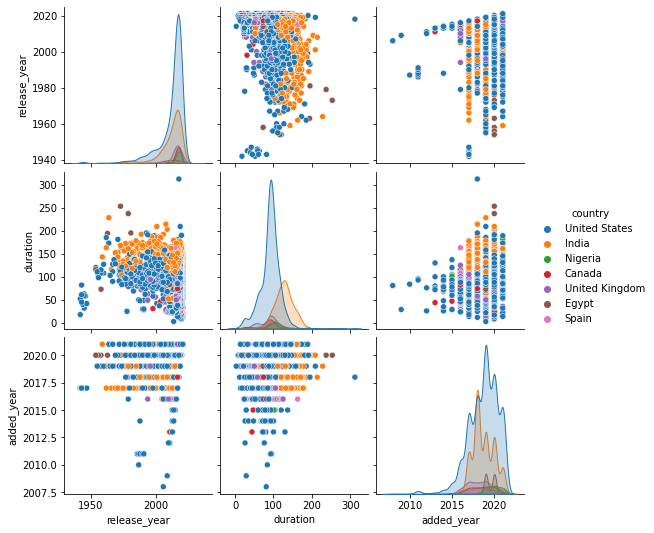

In [ ]:
sns.pairplot(data=df_mov1 ,hue = 'country')
plt.show()

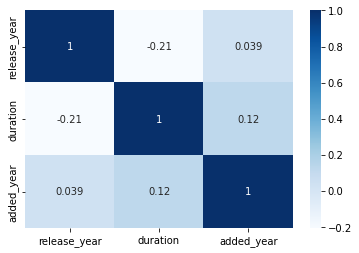

In [ ]:
# It can be seen that there is no corelation as the numberical data are not relatable to each other
sns.heatmap(df_mov.corr(), cmap= "Blues", annot=True)
plt.show()

# Business Insights and Recommendations 

Dataset consists of details of 8807 Movies/TV shows and 12 attributes.

**Business Insights:**

1.	There are around 4993 unique directors and the following directors: Rajiv Chilaka, Jan Suter and Raúl Campos have directed a greater number of movies comparatively.
2.	36440 unique actors and Anupam Kher, Shah Rukh Khan and Julie Tejwani have appeared in 30+ movies/TV shows.
3.	The content available is from around 128 countries and United States, India and United Kingdom have contributed nearly half of the total contents available.
4.	42 unique genres and from which international movies, Dramas, Comedies, International TV Shows and Documentaries are the top 5 genres available.
5.	There are around 6131 movies and 2676 TV Shows available. For the last four years, there is a clear trend of increase in the number of TV shows released and decrease in the number of movies released.
6.	We have movies and TV shows released in 74 unique years with the greatest number of contents released after 2015. The highest number of contents is added in the year 2018.
7.	15 unique ratings with most contents having the following 2 ratings: TV-MA and TV-14
8.	TV shows are categorised as per the number of seasons where seasons 1-5 contributes more content and most of the TV shows have at most 2 seasons. India produce TV shows with season 1-3 and not more than 3 seasons.
9.	Contents are added for the past 14 years and nearly half of the contents are added in the years 2018, 2019 and 2020.
10.	Duration of movies are mostly from 50 – 160 minutes with some outliers. Nearly half of the movies fall in the duration range of 90-120 minutes. India has an average duration of 130 minutes whereas other countries have a duration of around 100 minutes. Documentaries genre has a lowest average duration of 80 minutes.
11.	Most contents are added in the last quarter (October, November and December) comparatively.
12.	 United Kingdom produces almost similar number of TV shows and movies whereas the numbers of movies released in other countries are comparatively higher.
13.	United States produces more content in Documentaries and Dramas whereas other countries produce dramas and international movies in the recent 4 years.
14.	India produces more content in TV-14, then TV-MA whereas other countries produce more content in TV-MA category in the recent 4 years.


**Recommendations:**

1.	It can be clearly seen there is an increased trend in number of TV shows getting released in the past 4 years. We recommend to concentrate more TV Shows.
2.	US, India and UK produce more content and we recommend to produce more movies/ TV shows from these countries.
3.	UK produces 550+ TV Shows and United States produces around 1200+ TV Shows. 
4.	US produces around 200+ TV Shows each in TV Comedies, TV Dramas and Kid’s TV. So producing TV shows would be benefitting.
5.	UK produces famous British TV shows (225+) and International TV shows (125+) genre. We recommend to produce such similar shows.
6.	India produces nearly 100+ of TV shows out of which international movies (60+) and Dramas, Comedies (each 20+)
7.	US produce movies in the following genres: Dramas (800+), Comedies (650+), Documentaries (500+) Producing movies in these genres is recommended.
8.	India’s movie genres are international movies (850+), Dramas (600+) and Comedies (300+). International movies and dramas are recommended. Also, Documentaries are comparatively popular in US and UK but not in India. So, creating contents in Documentaries genre can be recommended.
9.	UK produce less movies compared to US and India but stands as a third nation with most movie content with 150+ movies in each genre of international movies and dramas.
10.	Movies/TV Shows with ratings TV-MA and TV-14 is recommended.
11.	For TV Shows we would recommend to produce with seasons 1-3 and movies with average duration of 90 minutes except India where the average duration of 120 minutes is recommended.
12.	Adding content during the last quarter (October, November and December) is recommended.
